<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Cuauhtémoc Corrales Camacho y Daniela Michel Mercado.

**Fecha:** 16 de septiembre del 2021.

**Expediente** : 724506 y 720482.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/danielamichel/Tarea3_4_DMichel_CCorrales

# Tarea 4, Clase 7

## Ejercicio 1
>Como ejemplo simple de una simulación de Monte Carlo, considere calcular la probabilidad de una suma particular del lanzamiento de tres dados (cada dado tiene valores del uno al seis). Además cada dado tiene las siguientes carácterísticas: el primer dado no está cargado (distribución uniforme todos son equiprobables); el segundo y tercer dado están cargados basados en una distribución binomial con parámetros (`n=5, p=0.5` y `n=5, p=0.2`). Calcule la probabilidad de que la suma resultante sea 7, 14 o 18. 

In [1]:
# Paqueterias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

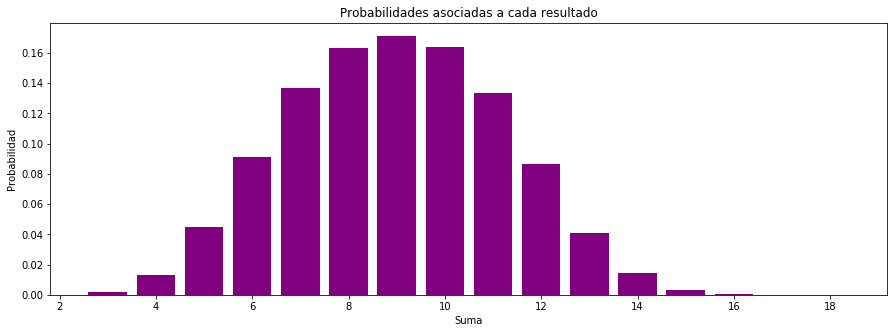

In [9]:
# Código de solución estudiante 1: 
# Definimos una función que arroje como resultado la suma de los tres dados
def suma_dados():
    return (np.random.randint(1,7,1)) + (st.binom(n=5, p=0.5).rvs(size=1)) + (st.binom(n=5, p=0.2).rvs(size=1))

# Simulamos 100000 posibles escenarios
# Iteramos y guardamos nuestros resultamos en una lista de resultados
N = 100000
res = [suma_dados() for i in range(N)]

# Graficamos un histograma para visualizar mejor nuestras probabilidades
y, x = np.histogram(res, bins=16, density=True)
plt.figure(figsize=[15,5])
plt.bar(range(3,19), y, color='purple')
plt.xlabel("Suma")
plt.ylabel("Probabilidad")
plt.title("Probabilidades asociadas a cada resultado");

In [7]:
# Finalmente describimos las probabilidades para que la suma sea igual a 7, 14 y 18
print(f'Probabilidad de que la suma sea 7: {y[4]}')
print(f'Probabilidad de que la suma sea 14: {y[11]}')
print(f'Probabilidad de que la suma sea 18: {y[15]}')

Probabilidad de que la suma sea 7: 0.14529142857142857
Probabilidad de que la suma sea 14: 0.04484571428571429
Probabilidad de que la suma sea 18: 4.571428571428571e-05


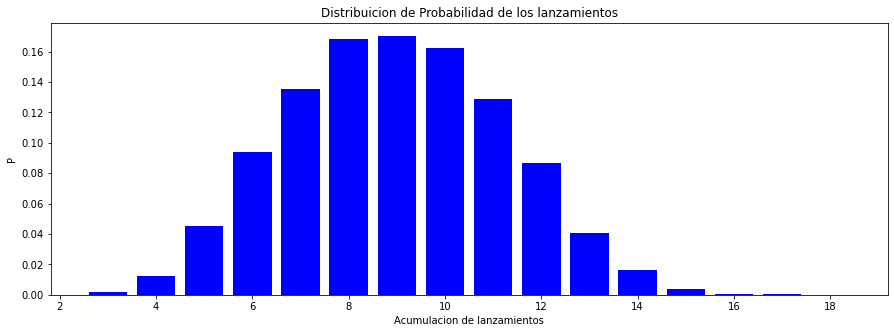

In [5]:
# Código de solución estudiante 2
def lanzamiento():
    d1 = np.random.randint(1,7,1)
    d2 = st.binom(n=5, p=0.5).rvs(size=1)
    d3 = st.binom(n=5, p=0.2).rvs(size=1)
    return d1+d2+d3

N = 10**4
resultado = [lanzamiento() for i in range(N)]

y, x = np.histogram(resultado, bins=16, density=True)
plt.figure(figsize=[15,5])
plt.bar(range(3,19), y, color='blue')
plt.xlabel("Acumulacion de lanzamientos")
plt.ylabel("P")
plt.title("Distribuicion de Probabilidad de los lanzamientos");

In [11]:
P7,P14,P18 = round(y[4],4)*100,round(y[11],4)*100,round(y[15],4)*100
print("La probabildidad de que la suma de los dados sea 7 es:",P7,"%")
print("La probabildidad de que la suma de los dados sea 14 es:",P14,"%")
print("La probabildidad de que la suma de los dados sea 18 es:",P18,"%")

La probabildidad de que la suma de los dados sea 7 es: 13.56 %
La probabildidad de que la suma de los dados sea 14 es: 1.63 %
La probabildidad de que la suma de los dados sea 18 es: 0.01 %


# 2 Ejercicio de aplicación- Cafetería Central

> Premisas para la simulación:
- Negocio de alimentos que vende bebidas y alimentos.
- Negocio dentro del ITESO.
- Negocio en cafetería central.
- Tipo de clientes (hombres y mujeres).
- Rentabilidad del 60%.

## Objetivo
Realizar una simulación estimado el tiempo medio que se tardaran los clientes en ser atendidos entre el horario de 6:30 a 1 pm. Además saber el consumo. 
**Analizar supuestos y limitantes**

## Supuestos en simulación
Clasificación de clientes: 
- Mujer  = 1 $\longrightarrow$ aleatorio < 0.5
- Hombre = 0 $\longrightarrow$ aleatorio $\geq$ 0.5.

Condiciones iniciales:
- Todas las distrubuciones de probabilidad se supondrán uniformes.
- Tiempo de simulación: 6:30 am - 1:30pm $\longrightarrow$ T = 7 horas = 25200 seg.
- Tiempo de llegada hasta ser atendido: Min=5seg, Max=30seg.
- Tiempo que tardan los clientes en ser atendidos:
    - Mujer: Min = 1 min= 60seg, Max = 5 min = 300 seg
    - Hombre: Min = 40 seg, Max = 2 min= 120 seg
- Consumo según el tipo de cliente:
    - Mujer: Min = 30 pesos, Max = 100 pesos
    - Hombre: Min = 20 pesos, Max = 80 pesos

Responder las siguientes preguntas basados en los datos del problema:
1. ¿Cuáles fueron los gastos de los hombres y las mujeres en 5 días de trabajo?.
2. ¿Cuál fue el consumo promedio de los hombres y mujeres?
3. ¿Cuál fue el número de personas atendidas por día?
4. ¿Cuál fue el tiempo de atención promedio?
5. ¿Cuánto fue la ganancia promedio de la cafetería en 5 días de trabajo y su respectiva rentabilidad?

In [2]:
# DATOS DEL PROBLEMA
d = 5
T =25200
T_at_min = 5; T_at_max = 30
T_mujer_min =60; T_mujer_max = 300
T_hombre_min = 40; T_hombre_max = 120
C_mujer_min = 30; C_mujer_max = 100
C_hombre_min = 20; C_hombre_max = 80


In [8]:
# Código de solución estudiante 1: 
d = 5
T =25200
T_at_min = 5; T_at_max = 30
T_mujer_min =60; T_mujer_max = 300
T_hombre_min = 40; T_hombre_max = 120
C_mujer_min = 30; C_mujer_max = 100
C_hombre_min = 20; C_hombre_max = 80

# Definimos algunas otras variables a utilizar
escenarios = 1
t_atencion = np.random.randint(5, 31, escenarios)
at_hombres = np.random.randint(40, 121, escenarios)
at_mujeres = np.random.randint(60, 300, escenarios)

# Comenzamos a iterar tanto sobre los 5 dias (d) como el tiempo que queremos por dia (T)
# Variables iniciales
dia = 0
gasto_total_mujeres = 0
gasto_total_hombres = 0

# Empezamos a iterar sobre los dias
while dia <= d:
    
    # Variables auxiliares que nos ayudaran a definir valores parciales por cada dia
    tiempo = 0
    gasto_parcial_mujeres = 0
    gasto_parcial_hombres = 0
    cantidad_mujeres = 0
    cantidad_hombres = 0
    atencion = 0
    
    # Segundo ciclo, iteracion por tiempo
    while tiempo <= T:
        if np.random.randint(0,2) == 0:
            gasto_parcial_mujeres += np.mean(np.random.randint(C_mujer_min, C_mujer_max))
            cantidad_mujeres += 1
            tiempo += np.mean(t_atencion) + np.mean(at_mujeres)
            atencion += np.mean(t_atencion)
            
        elif np.random.randint(0,2) == 1:
            gasto_parcial_hombres += np.mean(np.random.randint(C_hombre_min, C_hombre_max))
            cantidad_hombres += 1
            tiempo += np.mean(t_atencion) + np.mean(at_hombres)
            atencion += np.mean(t_atencion)
            
    # Almacenamos los gastos totales compuestos de los parciales correspondientes a cada dia
    gasto_total_mujeres += gasto_parcial_mujeres
    gasto_total_hombres += gasto_parcial_hombres
    dia += 1

# Variables que nos interesaran para dar respuesta a las preguntas
gasto_total_hombres, gasto_total_mujeres, cantidad_hombres, cantidad_mujeres, atencion / (cantidad_hombres+cantidad_mujeres)

(16110.0, 45193.0, 57, 114, 8.0)

In [10]:
#PREGUNTA 1
# ¿Cuáles fueron los gastos de los hombres y las mujeres en 5 días de trabajo?
print(f'El gasto en 5 días en total es igual a ${int(gasto_total_hombres + gasto_total_mujeres)}')
print(f'''Donde ${int(gasto_total_mujeres)} corresponden a los gastos de las mujeres y 
      ${int(gasto_total_hombres)} al de los hombres''')

El gasto en 5 días en total es igual a $61303
Donde $45193 corresponden a los gastos de las mujeres y 
      $16110 al de los hombres


In [11]:
# PREGUNTA 2
# ¿Cuál fue el consumo promedio de los hombres y mujeres?
print(f'El gasto promedio de los hombres fue de ${gasto_parcial_hombres/cantidad_hombres}')
print(f'El gasto promedio de las mujeres fue de ${gasto_parcial_mujeres/cantidad_mujeres}')

El gasto promedio de los hombres fue de $47.40350877192982
El gasto promedio de las mujeres fue de $64.98245614035088


In [12]:
#PREGUNTA 3
# ¿Cuál fue el número de personas atendidas por día?
print(f'La cantidad de personas atendidas por día fue de {cantidad_hombres+cantidad_mujeres}')

La cantidad de personas atendidas por día fue de 171


In [13]:
#PREGUNTA 4
# ¿Cuál fue el tiempo de atención promedio?
print(f'El tiempo de atención promedio fue de {atencion/(cantidad_hombres+cantidad_mujeres)} segundos')

El tiempo de atención promedio fue de 8.0 segundos


In [14]:
#PREGUNTA 5
# ¿Cuánto fue la ganancia promedio de la cafetería en 5 días de trabajo y su respectiva rentabilidad?
print(f'La ganancia/ingreso promedio en 5 días de la cafeteria fue de ${int(gasto_total_hombres + gasto_total_mujeres)}')
print(f'La rentabilidad fue de ${int(gasto_total_hombres + gasto_total_mujeres)*0.6}')

La ganancia/ingreso promedio en 5 días de la cafeteria fue de $61303
La rentabilidad fue de $36781.799999999996


In [1]:
# Código de solución estudiante 2

